##Cargamos un archivo con lo datos

In [1]:
import pandas as pd
ruta = "https://www.coes.org.pe/portal/browser/download?url=Post%20Operaci%C3%B3n%2FReportes%2FIDCOS%2F2020%2F10_OCTUBRE%2FD%C3%ADa%2030%2FAnexo9_Hidrologia_tiempo_real_20201030.xlsx"
datos = pd.read_excel(ruta)

###Buscamos un dato en particular

In [3]:
datos.shape
#datos.head(10)

(33, 79)

In [4]:
jj = datos.eq("CHILI").any()
ii = datos.eq("CHILI").any(1)

In [10]:
#datos.loc[:,jj]
jj2 = datos.loc[:,jj].eq("Caudal turbinado").any()
ii2 = datos.loc[:,jj].eq("Caudal turbinado").any(1)

ii2_start = ii2.index[ii2][0]+2

#datos.loc[:,jj].loc[ii2_start:,jj2]

serie = datos.loc[:,jj].loc[ii2_start:,jj2]

In [ ]:
serie.reset_index(drop=True,inplace=True)
serie.columns = ["Caudal"]
serie

##Recolectamos un dataset para un rango de fecha determinado

In [14]:
serie = pd.DataFrame()

rango_anno = [2020]
rango_mes = [10,11] #range(1,13)
rango_dia = range(1,32)

name_mes = {"01":"ENERO",
            "02":"FEBRERO",
            "03":"MARZO",
            "04":"ABRIL",
            "05":"MAYO",
            "06":"JUNIO",
            "07":"JULIO",
            "08":"AGOSTO",
            "09":"SETIEMBRE",
            "10":"OCTUBRE",
            "11":"NOVIEMBRE",
            "12":"DICIEMBRE",}

for anno in rango_anno:
  for mes in rango_mes:
    for dia in rango_dia:
      if mes == 2 and dia > 28:
        continue
      elif mes in [9,4,6,11] and dia == 31:
        continue

      if mes < 10:
        smes = "0"+str(mes)
      else:
        smes = str(mes)

      if dia < 10:
        sdia = "0"+str(dia)
      else:
        sdia = str(dia)

      try: 
        strfecha = str(anno)+smes+sdia
        ruta = "https://www.coes.org.pe/portal/browser/download?url=Post%20Operaci%C3%B3n%2FReportes%2FIDCOS%2F"+str(anno)+"%2F"+smes+"_"+name_mes[smes]+"%2FD%C3%ADa%20"+sdia+"%2FAnexo9_Hidrologia_tiempo_real_"+strfecha+".xlsx"
        datos = pd.read_excel(ruta)

        jj = datos.eq("CHILI").any()
        ii = datos.eq("CHILI").any(1)

        jj2 = datos.loc[:,jj].eq("Caudal turbinado").any()
        ii2 = datos.loc[:,jj].eq("Caudal turbinado").any(1)
        ii2_start = ii2.index[ii2][0]+2
        datos.loc[:,jj].loc[ii2_start:,jj2]

        serie_tmp = datos.loc[:,jj].loc[ii2_start:,jj2]
        serie = pd.concat([serie,serie_tmp], ignore_index=True)
      except:
        continue


In [16]:
serie.shape

(1248, 1)

###Exploramos un poco el dataset

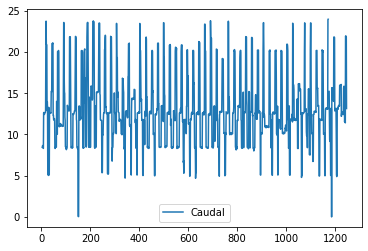

In [17]:
serie.columns = ["Caudal"]
serie.plot()

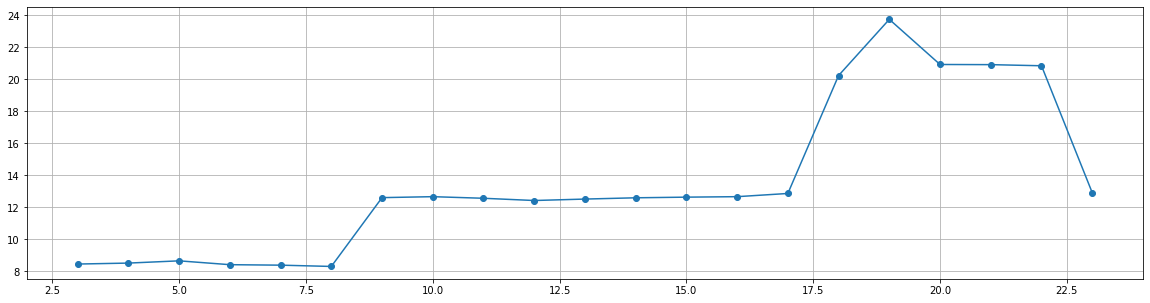

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(serie.Caudal[0:24],'o-')
plt.grid(True)

In [19]:
serie.shape

(1248, 1)

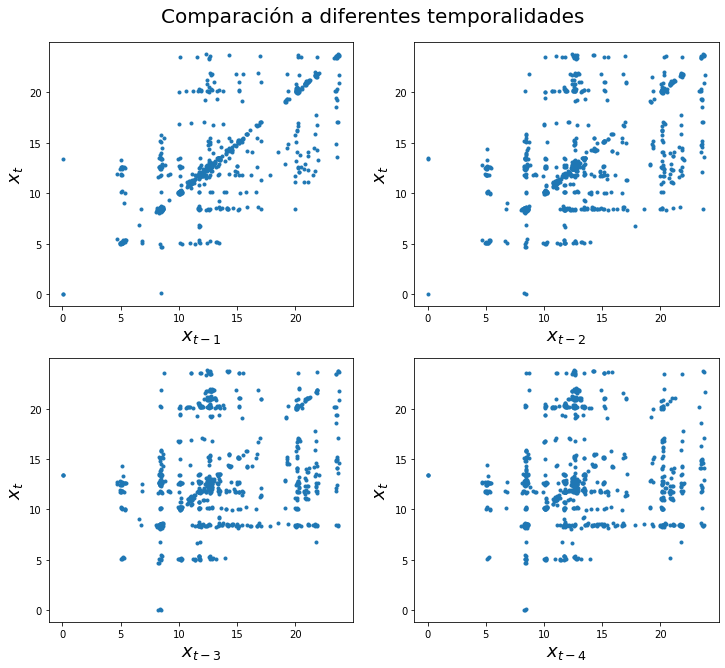

In [20]:
fig=plt.figure(figsize=(12,10))

plt.subplot(221)
plt.plot(serie[0:1000],serie[1:1001],'.')
plt.xlabel("$x_{t-1}$", fontsize=18)
plt.ylabel("$x_t$", fontsize=18)

plt.subplot(222)
plt.plot(serie[0:1000],serie[2:1002],'.')
plt.xlabel("$x_{t-2}$", fontsize=18)
plt.ylabel("$x_t$", fontsize=18)

plt.subplot(223)
plt.plot(serie[0:1000],serie[3:1003],'.')
plt.xlabel("$x_{t-3}$", fontsize=18)
plt.ylabel("$x_t$", fontsize=18)

plt.subplot(224)
plt.plot(serie[0:1000],serie[4:1004],'.')
plt.xlabel("$x_{t-4}$", fontsize=18)
plt.ylabel("$x_t$", fontsize=18)

#plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Comparación a diferentes temporalidades",fontsize=20)
fig.subplots_adjust(top=0.93)

In [21]:
from statsmodels.tsa.stattools import acf,pacf

serie = serie.astype("float")
print(acf(serie, fft=False, missing="drop"))

ii_tmp = ~serie.Caudal.isna()
print(pacf(serie[ii_tmp]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[ 1.          0.7659744   0.5184039   0.29480734  0.09340504 -0.05950645
 -0.16680297 -0.2203085  -0.2610266  -0.2912463  -0.31362509 -0.35275414
 -0.36835851 -0.35042289 -0.31247148 -0.28489162 -0.25507568 -0.21225927
 -0.15318729 -0.03619104  0.11240591  0.29351981  0.4724703   0.62606343
  0.71434473  0.62267037  0.45954662  0.26780871  0.09044972 -0.05099462
 -0.1441495  -0.19651572 -0.23641379 -0.2674517  -0.30403026 -0.34944699
 -0.36664681 -0.33842807 -0.29436406 -0.26560852 -0.2311736 ]
[ 1.00000000e+00  7.66593118e-01 -1.65940177e-01 -1.03166914e-01
 -1.20998368e-01 -6.41051312e-02 -6.37219551e-02 -2.29415028e-02
 -9.91891654e-02 -9.21165567e-02 -1.00350266e-01 -1.63034498e-01
 -8.84209682e-02 -6.58966592e-02 -8.52136966e-02 -1.59183365e-01
 -1.42062934e-01 -1.28893759e-01 -1.03214205e-01  3.40847496e-02
  4.71279180e-02  1.51649900e-01  1.78202545e-01  2.44046477e-01
  2.49199614e-01 -6.43859351e-02  9.79768377e-03 -2.91710444e-02
  4.24112111e-04 -1.44021056e-02  2.15564706e

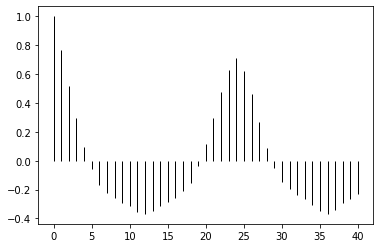

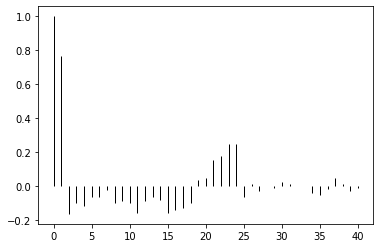

In [22]:
ytmp = acf(serie, fft=False, missing="drop")
plt.bar(range(len(ytmp)),ytmp, width=0, ec="k")
plt.show()

ytmp = pacf(serie[ii_tmp])
plt.bar(range(len(ytmp)),ytmp, width=0, ec="k")
plt.show()

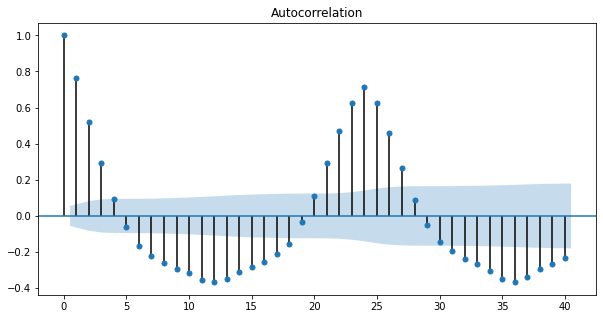

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10,5))
plot_acf(serie.Caudal[ii_tmp], lags=40, ax=ax)
plt.show()

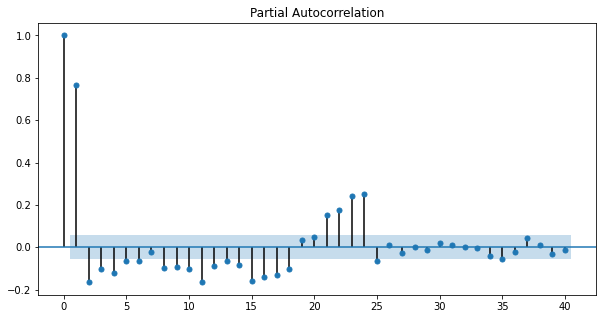

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(serie.Caudal[ii_tmp], lags=40, ax=ax)
plt.show()

###Hacemos una pequeña transformación

In [25]:
tmp = serie.iloc[0:16].copy()
tmp

,Caudal
0,NaN
1,NaN
2,NaN
3,8.46
4,8.52
5,8.66
6,8.42
7,8.39
8,8.31
9,12.61


In [ ]:
tmp.values.reshape((8,2))

In [27]:
nrow , _ = tmp.shape
pd.concat([tmp[0:(nrow-2)].reset_index(drop=True),
           tmp[1:(nrow-1)].reset_index(drop=True),
           tmp[2:nrow].reset_index(drop=True)], axis=1, ignore_index=True)


,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,8.46
2,NaN,8.46,8.52
3,8.46,8.52,8.66
4,8.52,8.66,8.42
5,8.66,8.42,8.39
6,8.42,8.39,8.31
7,8.39,8.31,12.61
8,8.31,12.61,12.67
9,12.61,12.67,12.57


In [50]:
nrow , _ = serie.shape
lag = 24+1

XY = serie[0:(nrow-lag+1)].reset_index(drop=True)
for i in range(1,lag):
  XY = pd.concat([XY, serie[i:(nrow-lag+i)].reset_index(drop=True)], axis=1, ignore_index=True)

XY.fillna(0, inplace=True)

XY

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.00,0.00,0.00,8.46,8.52,8.66,8.42,8.39,8.31,12.61,12.67,12.57,12.43,12.52,12.60,12.64,12.67,12.87,20.24,23.75,20.93,20.92,20.85,12.92,13.97
1,0.00,0.00,8.46,8.52,8.66,8.42,8.39,8.31,12.61,12.67,12.57,12.43,12.52,12.60,12.64,12.67,12.87,20.24,23.75,20.93,20.92,20.85,12.92,13.97,13.16
2,0.00,8.46,8.52,8.66,8.42,8.39,8.31,12.61,12.67,12.57,12.43,12.52,12.60,12.64,12.67,12.87,20.24,23.75,20.93,20.92,20.85,12.92,13.97,13.16,5.15
3,8.46,8.52,8.66,8.42,8.39,8.31,12.61,12.67,12.57,12.43,12.52,12.60,12.64,12.67,12.87,20.24,23.75,20.93,20.92,20.85,12.92,13.97,13.16,5.15,5.20
4,8.52,8.66,8.42,8.39,8.31,12.61,12.67,12.57,12.43,12.52,12.60,12.64,12.67,12.87,20.24,23.75,20.93,20.92,20.85,12.92,13.97,13.16,5.15,5.20,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,15.97,15.98,15.89,15.97,15.93,16.02,16.07,12.20,12.58,12.68,12.53,12.58,12.70,12.63,12.64,12.42,15.62,15.85,15.83,15.82,11.55,11.78,11.87,11.41,21.93
1220,15.98,15.89,15.97,15.93,16.02,16.07,12.20,12.58,12.68,12.53,12.58,12.70,12.63,12.64,12.42,15.62,15.85,15.83,15.82,11.55,11.78,11.87,11.41,21.93,21.84
1221,15.89,15.97,15.93,16.02,16.07,12.20,12.58,12.68,12.53,12.58,12.70,12.63,12.64,12.42,15.62,15.85,15.83,15.82,11.55,11.78,11.87,11.41,21.93,21.84,21.93
1222,15.97,15.93,16.02,16.07,12.20,12.58,12.68,12.53,12.58,12.70,12.63,12.64,12.42,15.62,15.85,15.83,15.82,11.55,11.78,11.87,11.41,21.93,21.84,21.93,21.80


In [32]:
X = XY.iloc[:,0:(lag-1)]
Y = XY.iloc[:,(lag-1)]

In [ ]:
print(Y)

##Preparamos el dataset para "entrenar" modelos!

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

###Modelo 1

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(Xtrain, Ytrain)
Yhat = model1.predict(Xtest)

####Evaluamos el desempeño

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

9.771196835512765
1.956360597905991
0.5573668802511677


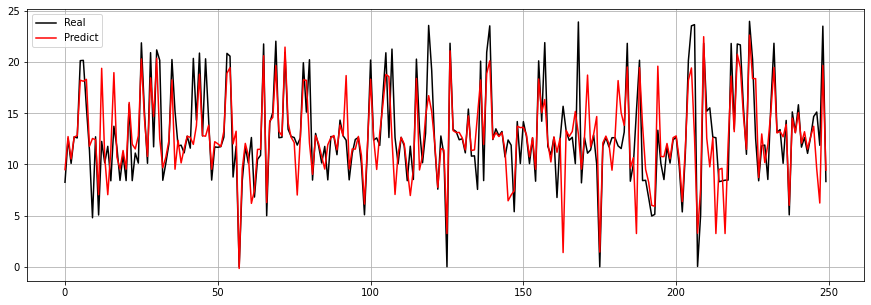

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(Ytest.values, 'k-', label="Real")
plt.plot(Yhat, 'r-', label="Predict")
plt.legend()
plt.grid()

###Modulo 2

In [38]:
from sklearn.tree import DecisionTreeRegressor
mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)
Yhat = mo2.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

19.623744575999996
2.594312
0.11104858196490486


In [40]:
Yhat2 = mo2.predict(Xtrain)
print(r2_score(Ytrain, Yhat2))

0.9921035210757881


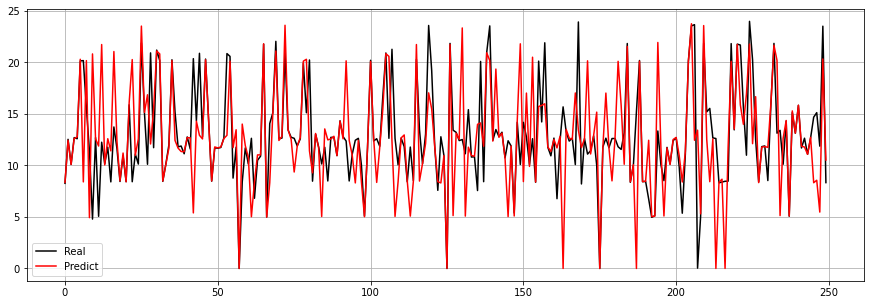

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(Ytest.values, 'k-', label="Real")
plt.plot(Yhat, 'r-', label="Predict")
plt.legend()
plt.grid()

####Sintonizamos el modelo mediante Cross-Validation

In [41]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,10),          # [3,4,5]
          "min_samples_split": np.arange(2,10)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
      

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.561882584740375
{'max_depth': 4, 'min_samples_split': 5}


####Re-entrenamos el modelo con los "mejores" hiperparametros 

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mo2 = DecisionTreeRegressor(max_depth=4, min_samples_split=5)
mo2.fit(Xtrain, Ytrain)
Yhat = mo2.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

11.87552440986009
2.116747131975394
0.46204129272215855


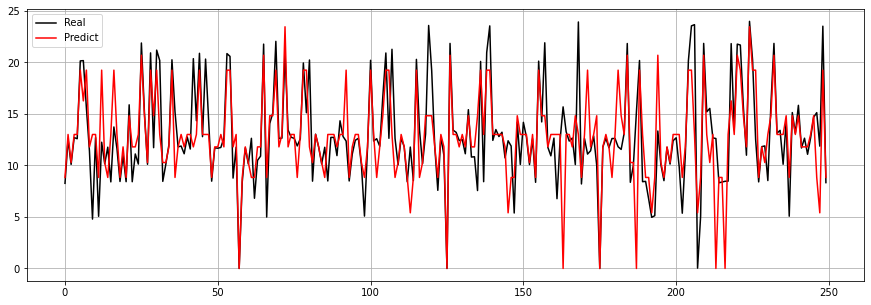

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(Ytest.values, 'k-', label="Real")
plt.plot(Yhat, 'r-', label="Predict")
plt.legend()
plt.grid()

###Modelo 3

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

params = {"n_estimators": [100],
          #"max_depth": [2,3], 
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,8,10,15]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

print(grid.best_score_)
print(grid.best_params_)

0.5822936641565057
{'max_leaf_nodes': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mo3 = RandomForestRegressor(max_leaf_nodes = 15, 
                            min_samples_split = 2,
                            n_estimators = 100)
mo3.fit(Xtrain,Ytrain)
Yhat = mo3.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  10.909101204510282
MAE:  2.070806646589762
R^2:  0.5058200565299806


###Modelo 4

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()

params = {"n_estimators": [100],
          "learning_rate": [1,0.1,0.01],
          "max_depth": [2,3,5,10], 
          "min_samples_split": [2,5,10], 
          "max_leaf_nodes": [2,5,10]
          }

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

print(grid.best_score_)
print(grid.best_params_)

0.5805292073583805
{'learning_rate': 0.1, 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mo4 = GradientBoostingRegressor(learning_rate = 0.1, 
                                max_depth = 2,
                                max_leaf_nodes = 2, 
                                min_samples_split = 2, 
                                n_estimators = 100)
mo4.fit(Xtrain,Ytrain)
Yhat = mo4.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  11.263199673841807
MAE:  2.1252953181877885
R^2:  0.4897794718588322


##Incorporando otras variables

In [51]:
serie = pd.DataFrame()

rango_anno = [2020]
rango_mes = [10,11] #range(1,13)
rango_dia = range(1,32)

name_mes = {"01":"ENERO",
            "02":"FEBRERO",
            "03":"MARZO",
            "04":"ABRIL",
            "05":"MAYO",
            "06":"JUNIO",
            "07":"JULIO",
            "08":"AGOSTO",
            "09":"SETIEMBRE",
            "10":"OCTUBRE",
            "11":"NOVIEMBRE",
            "12":"DICIEMBRE",}

for anno in rango_anno:
  for mes in rango_mes:
    for dia in rango_dia:
      if mes == 2 and dia > 28:
        continue
      elif mes in [9,4,6,11] and dia == 31:
        continue

      if mes < 10:
        smes = "0"+str(mes)
      else:
        smes = str(mes)

      if dia < 10:
        sdia = "0"+str(dia)
      else:
        sdia = str(dia)

      try: 
        strfecha = str(anno)+smes+sdia
        ruta = "https://www.coes.org.pe/portal/browser/download?url=Post%20Operaci%C3%B3n%2FReportes%2FIDCOS%2F"+str(anno)+"%2F"+smes+"_"+name_mes[smes]+"%2FD%C3%ADa%20"+sdia+"%2FAnexo9_Hidrologia_tiempo_real_"+strfecha+".xlsx"
        datos = pd.read_excel(ruta)

        jj = datos.eq("CHILI").any()
        ii = datos.eq("CHILI").any(1)

        jj2 = datos.loc[:,jj].eq("Caudal turbinado").any()
        ii2 = datos.loc[:,jj].eq("Caudal turbinado").any(1)
        ii2_start = ii2.index[ii2][0]+2
        datos.loc[:,jj].loc[ii2_start:,jj2]

        serie_tmp = datos.loc[:,jj].loc[ii2_start:,jj2]
        serie_tmp.columns = ["Caudal"]
        serie_tmp["Year"] = anno
        serie_tmp["Month"] = mes
        serie_tmp["Day"] = dia

        serie = pd.concat([serie,serie_tmp], ignore_index=True)
      except:
        continue


In [ ]:
serie

### Preparamos el dataset

In [ ]:
serie

In [57]:
nrow , ncol = serie.shape
lag = 3+1

XY = serie[0:(nrow-lag+1)].reset_index(drop=True)
for i in range(1,lag):
  XY = pd.concat([XY, serie[i:(nrow-lag+i)].reset_index(drop=True)], axis=1, ignore_index=True)

XY = XY.iloc[:,0:(XY.shape[1]-ncol+1)]


In [58]:
XY.fillna(0,inplace=True)
XY

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,2020,10,1,0.00,2020.0,10.0,1.0,0.00,2020.0,10.0,1.0,8.46
1,0.00,2020,10,1,0.00,2020.0,10.0,1.0,8.46,2020.0,10.0,1.0,8.52
2,0.00,2020,10,1,8.46,2020.0,10.0,1.0,8.52,2020.0,10.0,1.0,8.66
3,8.46,2020,10,1,8.52,2020.0,10.0,1.0,8.66,2020.0,10.0,1.0,8.42
4,8.52,2020,10,1,8.66,2020.0,10.0,1.0,8.42,2020.0,10.0,1.0,8.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,11.78,2020,11,22,11.87,2020.0,11.0,22.0,11.41,2020.0,11.0,22.0,21.93
1241,11.87,2020,11,22,11.41,2020.0,11.0,22.0,21.93,2020.0,11.0,22.0,21.84
1242,11.41,2020,11,22,21.93,2020.0,11.0,22.0,21.84,2020.0,11.0,22.0,21.93
1243,21.93,2020,11,22,21.84,2020.0,11.0,22.0,21.93,2020.0,11.0,22.0,21.80


In [ ]:
nobs, nvar = XY.shape 
X = XY.iloc[:,0:(nvar-1)]
Y = XY.iloc[:,(nvar-1)]

In [ ]:
X

In [ ]:
nobs, nvar = X.shape

ntrain = int(nobs*0.8)
ntest = nobs-ntrain

Xtrain = X.iloc[0:ntrain]
Ytrain = Y.iloc[0:ntrain]

Xtest = X.iloc[ntrain:nobs]
Ytest = Y.iloc[ntrain:nobs]


####Escalamos los Datos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
XtrainS = scaler.transform(Xtrain)
XtestS = scaler.transform(Xtest)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerN = MinMaxScaler()
scalerN.fit(Xtrain)
XtrainN = scalerN.transform(Xtrain)
XtestN = scalerN.transform(Xtest)

###Modelo 4: Red Neuronal FeedForward

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()

params = {"activation": ['logistic', 'tanh','relu'],
          "hidden_layer_sizes": [(1,),(5,),(10,)],
          "learning_rate_init":[0.001,0.0001,0.00001],
          "max_iter": [100]
         }

grid = GridSearchCV(estimator=model, param_grid=params,cv=5,scoring='explained_variance')
grid.fit(XtrainS, Ytrain)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

In [ ]:
mo6 = MLPRegressor(activation='tanh',
                   hidden_layer_sizes= (10,), 
                   learning_rate_init= 0.001, 
                   max_iter = 500)

mo6.fit(XtrainS, Ytrain)
Yhat = mo6.predict(XtestS)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(Ytest.values, 'k-', label="Real")
plt.plot(Yhat, 'r-', label="Predict")
plt.legend()
plt.grid()